# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

1. D
2. C
3. C
4. D
5. D



# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

#Import thư viện

In [ ]:
!pip install --quiet optuna

     |████████████████████████████████| 308 kB 13.1 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 210 kB 73.8 MB/s 
     |████████████████████████████████| 75 kB 6.2 MB/s 
     |████████████████████████████████| 150 kB 78.2 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 113 kB 51.4 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import glob
# import optuna
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
# from optuna.trial import TrialState
# from optuna.integration import TFKerasPruningCallback
#----------------------------------------------------------------------------
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, \
                                          img_to_array, array_to_img, load_img

In [ ]:
os.chdir('/content/gdrive/MyDrive/DungHi/dog_vs_cat')

In [ ]:
!ls train/train/cats | wc -l
!ls train/train/dogs | wc -l

In [ ]:
!find train/train -size 0 -exec rm {} + 
!find train/train -type f ! -name "*.jpg" -exec rm {} + 

In [ ]:
!ls train/train/cats | wc -l
!ls train/train/dogs | wc -l

#Chia tập train/val

In [ ]:
cat_imgs = 'train/train/cats'
dog_imgs = 'train/train/dogs'

In [ ]:
def move_to_destination(origin, destination, percentage_split):
    num_images = int(len(os.listdir(origin)) * percentage_split)
    for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
        shutil.move(os.path.join(origin, image_name), destination)

In [ ]:
val_dirs = ['train/val/cats', 'train/val/dogs']
for val_dir in val_dirs:
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

In [ ]:
move_to_destination(cat_imgs, 'train/val/cats', 0.2)
move_to_destination(dog_imgs, 'train/val/dogs', 0.2)

In [ ]:
!ls train/train/cats | wc -l
!ls train/train/dogs | wc -l
!ls train/val/cats | wc -l
!ls train/val/dogs | wc -l

10000
10000
2500
2500


#Tạo ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo train generator
train_generator = train_datagen.flow_from_directory(
    directory='train/train/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

#Tạo val generator
test_generator = test_datagen.flow_from_directory(
    directory='train/val/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

#Xây dựng mô hình

In [ ]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(224, 224, 3)))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

#Huấn luyện mô hình

In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
625/625 [==============================] - 3388s 5s/step - loss: 0.6669 - accuracy: 0.6672 - val_loss: 0.5099 - val_accuracy: 0.7550
Epoch 2/10
625/625 [==============================] - 145s 232ms/step - loss: 0.4629 - accuracy: 0.7779 - val_loss: 0.4442 - val_accuracy: 0.7908
Epoch 3/10
625/625 [==============================] - 147s 235ms/step - loss: 0.3702 - accuracy: 0.8349 - val_loss: 0.3777 - val_accuracy: 0.8276
Epoch 4/10
625/625 [==============================] - 149s 238ms/step - loss: 0.2860 - accuracy: 0.8788 - val_loss: 0.4176 - val_accuracy: 0.8266
Epoch 5/10
625/625 [==============================] - 148s 237ms/step - loss: 0.2029 - accuracy: 0.9155 - val_loss: 0.4037 - val_accuracy: 0.8408
Epoch 6/10
625/625 [==============================] - 148s 236ms/step - loss: 0.1258 - accuracy: 0.9503 - val_loss: 0.5136 - val_accuracy: 0.8312
Epoch 7/10
625/625 [==============================] - 146s 234ms/step - loss: 0.0826 - accuracy: 0.9701 - val_loss: 0.5687 - v

#Đánh giá model

In [ ]:
def get_training_metrics(history):
    history = history.history
    acc_train = history['accuracy']
    acc_test = history['val_accuracy']

    loss_train = history['loss']
    loss_test = history['val_loss']

    return acc_train, acc_test, loss_train, loss_test

In [ ]:
def plot_train_val(history):
    acc_train, acc_test, loss_train, loss_test = get_training_metrics(history)
    acc_plot = pd.DataFrame({'training accuracy': acc_train, 'evaluation accuracy': acc_test})
    acc_plot = sns.lineplot(data=acc_plot)
    acc_plot.set_title('Training vs evaluation accuracy')
    acc_plot.set_xlabel('Epoch')
    acc_plot.set_ylabel('Accuracy')
    plt.show()

    print("")

    loss_plot = pd.DataFrame({'training loss': loss_train, 'evaluation loss': loss_test})
    loss_plot = sns.lineplot(data=loss_plot)
    loss_plot.set_title('Training vs evaluation loss')
    loss_plot.set_xlabel('Epoch')
    loss_plot.set_ylabel('Loss')
    plt.show()

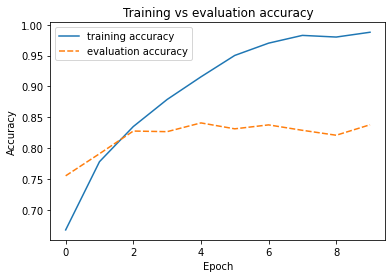

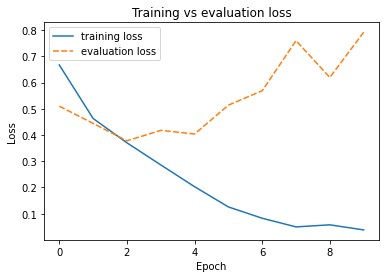

In [ ]:
plot_train_val(history)

#Grid search

In [ ]:
def create_model(trial):
    learning_rate = trial.suggest_float('lr', 1e-4, 1e-1, log=True)
    n_convolution_layers = trial.suggest_int('n_convolution_layers', 2, 6)
    n_dense_layers = trial.suggest_int('n_dense_layers', 1, 4)
    model = tf.keras.models.Sequential()

    model.add(Input(shape=(224, 224, 3)))
    for i in range(n_convolution_layers):
        filters = trial.suggest_int('n_filters_l{}'.format(i), 32, 128)
        model.add(Conv2D(filters,
                             kernel_size=3,
                             padding='same',
                             activation='relu',
                             kernel_initializer='he_uniform'))
        model.add(MaxPooling2D())

    model.add(Flatten())
    for i in range(n_dense_layers):
        units = trial.suggest_int('n_units_l{}'.format(i), 4, 128)
        model.add(Dense(units, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
def objective(trial):
    tf.keras.backend.clear_session()

    if tf.__version__ >= "2":
        monitor = "val_accuracy"
    else:
        monitor = "val_acc"


    model = create_model(trial)
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(patience=3),
                 TFKerasPruningCallback(trial, monitor)
    ]

    history = model.fit(
        train_generator,
        epochs=10,
        # steps_per_epoch=100,
        validation_data=test_generator,
        callbacks=callbacks
    )

    return history.history[monitor][-1]

In [ ]:
def show_result(study):
    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    print('Study statistics: ')
    print('  Number of finished trials: ', len(study.trials))
    print('  Number of pruned trials: ', len(pruned_trials))
    print('  Number of completed trials: ', len(complete_trials))

    print('Best trial: ')
    trial = study.best_trial

    print('Value', trial.value)
    
    print('Params: ')
    for key, value in trial.params.items():
        print(f" {key}: {value}")

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25, timeout=600)

[I 2022-02-23 08:38:02,935] A new study created in memory with name: no-name-58552e69-73d1-47a3-a716-19849fb1e627


Epoch 1/10
  6/625 [..............................] - ETA: 2:44 - loss: 9.9771 - accuracy: 0.4635 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0977s vs `on_train_batch_end` time: 0.1391s). Check your callbacks.


625/625 [==============================] - 198s 312ms/step - loss: 0.7766 - accuracy: 0.5749 - val_loss: 0.6387 - val_accuracy: 0.6428
Epoch 2/10
625/625 [==============================] - 194s 310ms/step - loss: 0.6030 - accuracy: 0.6783 - val_loss: 0.5942 - val_accuracy: 0.6852
Epoch 3/10
625/625 [==============================] - 194s 310ms/step - loss: 0.4868 - accuracy: 0.7650 - val_loss: 0.6287 - val_accuracy: 0.6812
Epoch 4/10
625/625 [==============================] - 194s 311ms/step - loss: 0.2545 - accuracy: 0.8959 - val_loss: 0.9439 - val_accuracy: 0.6640
Epoch 5/10
625/625 [==============================] - 194s 311ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 1.5133 - val_accuracy: 0.6708


[I 2022-02-23 08:54:18,220] Trial 0 finished with value: 0.670799970626831 and parameters: {'lr': 0.0009303819347559691, 'n_convolution_layers': 2, 'n_dense_layers': 4, 'n_filters_l0': 83, 'n_filters_l1': 82, 'n_units_l0': 128, 'n_units_l1': 28, 'n_units_l2': 109, 'n_units_l3': 46}. Best is trial 0 with value: 0.670799970626831.


In [ ]:
show_result(study)

Study statistics: 
  Number of finished trials:  1
  Number of pruned trials:  0
  Number of completed trials:  1
Best trial: 
Value 0.670799970626831
Params: 
 lr: 0.0009303819347559691
 n_convolution_layers: 2
 n_dense_layers: 4
 n_filters_l0: 83
 n_filters_l1: 82
 n_units_l0: 128
 n_units_l1: 28
 n_units_l2: 109
 n_units_l3: 46


#Retrain model

In [ ]:
trial = study.best_trial
model = create_model(trial)
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 195s 311ms/step - loss: 0.7117 - accuracy: 0.5868 - val_loss: 0.6092 - val_accuracy: 0.6534
Epoch 2/10
625/625 [==============================] - 194s 310ms/step - loss: 0.5669 - accuracy: 0.7083 - val_loss: 0.5736 - val_accuracy: 0.7030
Epoch 3/10
625/625 [==============================] - 194s 310ms/step - loss: 0.4091 - accuracy: 0.8105 - val_loss: 0.5835 - val_accuracy: 0.7234
Epoch 4/10
625/625 [==============================] - 194s 310ms/step - loss: 0.1792 - accuracy: 0.9313 - val_loss: 0.8099 - val_accuracy: 0.7158
Epoch 5/10
625/625 [==============================] - 193s 309ms/step - loss: 0.0597 - accuracy: 0.9815 - val_loss: 1.3790 - val_accuracy: 0.7126
Epoch 6/10
625/625 [==============================] - 193s 309ms/step - loss: 0.0316 - accuracy: 0.9916 - val_loss: 1.5982 - val_accuracy: 0.7136
Epoch 7/10
625/625 [==============================] - 193s 309ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 1.8207 -

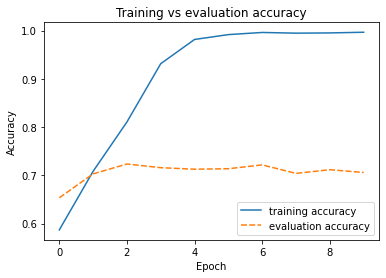

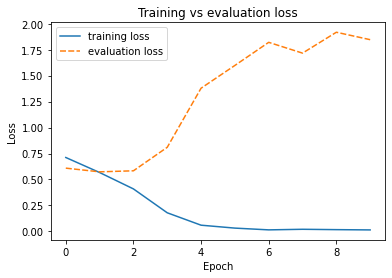

In [ ]:
plot_train_val(history)

#Transfer learning

##ResNet

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
do_fine_tuning = False
feature_extractor = hub.KerasLayer(
    handle=model_handle,
    trainable=do_fine_tuning,
    input_shape = (224, 224, 3),
    output_shape = [2048]
)

resnet = tf.keras.models.Sequential([
    feature_extractor,
    Dense(1, activation='sigmoid')
])

resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

In [ ]:
resnet.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 

In [ ]:
resnet.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=early_stopping)

Epoch 1/10
625/625 [==============================] - 11801s 19s/step - loss: 0.0572 - accuracy: 0.9790 - val_loss: 0.0478 - val_accuracy: 0.9832
Epoch 2/10
625/625 [==============================] - 113s 180ms/step - loss: 0.0303 - accuracy: 0.9886 - val_loss: 0.0430 - val_accuracy: 0.9854
Epoch 3/10
625/625 [==============================] - 113s 180ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0437 - val_accuracy: 0.9856
Epoch 4/10
625/625 [==============================] - 113s 180ms/step - loss: 0.0203 - accuracy: 0.9926 - val_loss: 0.0435 - val_accuracy: 0.9860
Epoch 5/10
625/625 [==============================] - 113s 180ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0448 - val_accuracy: 0.9864


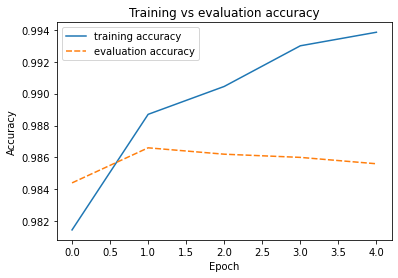

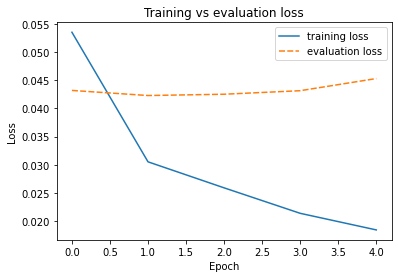

In [ ]:
plot_train_val(resnet.history)

In [ ]:
loss_test, accuracy_test = resnet.evaluate(test_generator)
print(f"Lost test: {loss_test:.4f}")
print(f"Accuracy test: {accuracy_test:.4f}")

157/157 [==============================] - 27s 174ms/step - loss: 0.0453 - accuracy: 0.9856
Lost test: 0.0453
Accuracy test: 0.9856


**Do kiến trúc mạng ResNet có nhiều lớp nên sẽ tiêu tốn nhiều tài nguyên huấn luyện nhưng bù lại sẽ có độ chính xác tốt hơn nhiều mô hình khác.**

##MobileNet

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
do_fine_tuning = False
feature_extractor = hub.KerasLayer(
    handle = model_handle,
    trainable=do_fine_tuning,
    input_shape=(224,224,3),
    output_shape=[1280])

mobilenet = tf.keras.models.Sequential([
    feature_extractor,
    Dense(1, activation='sigmoid')
])

mobilenet.build([None, 224, 224, 3])
mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4226432   
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,227,713
Trainable params: 1,281
Non-trainable params: 4,226,432
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('MobileNet_best.hdf5',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='min')
callbacks = [early_stopping, model_checkpoint]

In [ ]:
mobilenet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy']) 

In [ ]:
mobilenet.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9791
Epoch 1: val_loss improved from inf to 0.04192, saving model to MobileNet_best.hdf5
625/625 [==============================] - 114s 176ms/step - loss: 0.0644 - accuracy: 0.9791 - val_loss: 0.0419 - val_accuracy: 0.9858
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9900
Epoch 2: val_loss improved from 0.04192 to 0.03882, saving model to MobileNet_best.hdf5
625/625 [==============================] - 111s 177ms/step - loss: 0.0286 - accuracy: 0.9900 - val_loss: 0.0388 - val_accuracy: 0.9862
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9923
Epoch 3: val_loss improved from 0.03882 to 0.03792, saving model to MobileNet_best.hdf5
625/625 [==============================] - 110s 176ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0379 - val_accuracy: 0.9872
Epoch 4/10
625/625 [===========================

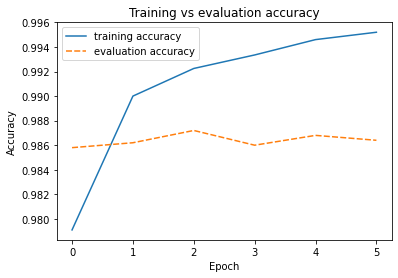

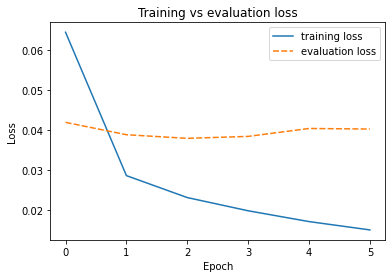

In [ ]:
plot_train_val(mobilenet.history)

In [ ]:
loss_test, accuracy_test = mobilenet.evaluate(test_generator)
print(f"Lost test: {loss_test:.4f}")
print(f"Accuracy test: {accuracy_test:.4f}")

157/157 [==============================] - 23s 146ms/step - loss: 0.0402 - accuracy: 0.9864
Lost test: 0.0402
Accuracy test: 0.9864


**Do kiến trúc mạng MobileNet ít lớp hơn nên sẽ ít tốn tài nguyên hơn cho nên việc huấn luyện sẽ nhanh hơn nhưng bù lại độ chính xác sẽ không bằng RestNet**

#Kĩ thuật Augmentation 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=60,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.5)

test_datagen = ImageDataGenerator(rescale=1./255)

# Tạo train generator
train_generator = train_datagen.flow_from_directory(
    directory='train/train/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

#Tạo val generator
test_generator = test_datagen.flow_from_directory(
    directory='train/val/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


##Retrain lại mô hình ResNet với data augmentation

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
do_fine_tuning = False
feature_extractor = hub.KerasLayer(
    handle=model_handle,
    trainable=do_fine_tuning,
    input_shape = (224, 224, 3),
    output_shape = [2048]
)

resnet = tf.keras.models.Sequential([
    feature_extractor,
    Dense(2, activation='softmax')
])

resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('RestNet_best.hdf5',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='min')
callbacks = [early_stopping, model_checkpoint]

In [ ]:
resnet.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 

In [ ]:
history = resnet.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.2501 - accuracy: 0.8949
Epoch 1: val_loss improved from inf to 0.06704, saving model to RestNet_best.hdf5
625/625 [==============================] - 319s 505ms/step - loss: 0.2501 - accuracy: 0.8949 - val_loss: 0.0670 - val_accuracy: 0.9774
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.2141 - accuracy: 0.9129
Epoch 2: val_loss improved from 0.06704 to 0.06412, saving model to RestNet_best.hdf5
625/625 [==============================] - 315s 504ms/step - loss: 0.2141 - accuracy: 0.9129 - val_loss: 0.0641 - val_accuracy: 0.9804
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9201
Epoch 3: val_loss did not improve from 0.06412
625/625 [==============================] - 316s 506ms/step - loss: 0.1995 - accuracy: 0.9201 - val_loss: 0.0646 - val_accuracy: 0.9784
Epoch 4/10
625/625 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9

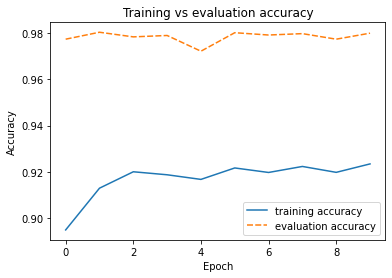

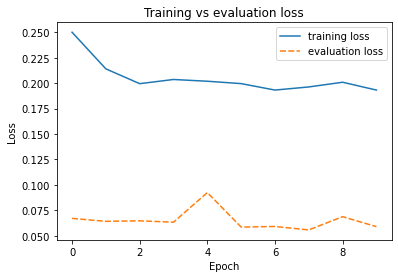

In [ ]:
plot_train_val(resnet.history)

In [ ]:
loss_test, accuracy_test = resnet.evaluate(test_generator)
print(f"Lost test: {loss_test:.4f}")
print(f"Accuracy test: {accuracy_test:.4f}")

157/157 [==============================] - 23s 146ms/step - loss: 0.0589 - accuracy: 0.9800
Lost test: 0.0589
Accuracy test: 0.9800


##Retrain lại mô hình MobileNet với data augmentation

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
do_fine_tuning = False
feature_extractor = hub.KerasLayer(
    handle = model_handle,
    trainable=do_fine_tuning,
    input_shape=(224,224,3),
    output_shape=[1280])

mobilenet = tf.keras.models.Sequential([
    feature_extractor,
    Dense(2, activation='softmax')
])

mobilenet.build([None, 224, 224, 3])
mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,228,994
Trainable params: 2,562
Non-trainable params: 4,226,432
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('MobileNet2_best.h5',
                                                      verbose=1,
                                                      save_best_only=True,
                                                      mode='min')
callbacks = [early_stopping, model_checkpoint]

In [ ]:
mobilenet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 

In [ ]:
history = mobilenet.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.9177
Epoch 1: val_loss improved from inf to 0.05713, saving model to MobileNet2_best.h5
625/625 [==============================] - 5214s 8s/step - loss: 0.1953 - accuracy: 0.9177 - val_loss: 0.0571 - val_accuracy: 0.9822
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.9396
Epoch 2: val_loss improved from 0.05713 to 0.05592, saving model to MobileNet2_best.h5
625/625 [==============================] - 294s 471ms/step - loss: 0.1539 - accuracy: 0.9396 - val_loss: 0.0559 - val_accuracy: 0.9798
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9408
Epoch 3: val_loss improved from 0.05592 to 0.05424, saving model to MobileNet2_best.h5
625/625 [==============================] - 293s 469ms/step - loss: 0.1465 - accuracy: 0.9408 - val_loss: 0.0542 - val_accuracy: 0.9804
Epoch 4/10
625/625 [==============================] 

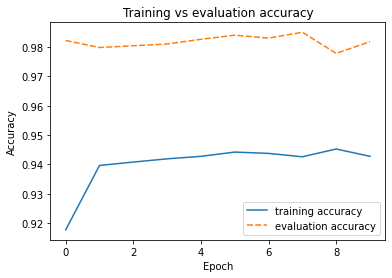

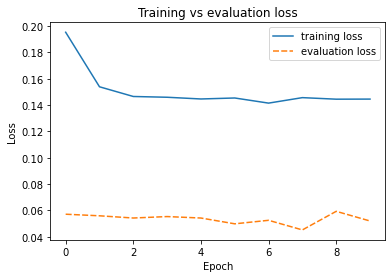

In [ ]:
# model = tf.keras.models.load_model('RestNet_best.hdf5')
plot_train_val(mobilenet.history)

In [ ]:
loss_test, accuracy_test = mobilenet.evaluate(test_generator)
print(f"Lost test: {loss_test:.4f}")
print(f"Accuracy test: {accuracy_test:.4f}")

157/157 [==============================] - 22s 137ms/step - loss: 0.0520 - accuracy: 0.9818
Lost test: 0.0520
Accuracy test: 0.9818


#Submit kết quả kaggle

In [ ]:
test_images = [f for f in glob.glob('test/test' + "/*.jpg")]
submission = pd.DataFrame({'id' : [os.path.basename(f) for f in test_images],'image_path': [f for f in test_images]})

In [ ]:
test_submission_datagen = ImageDataGenerator(rescale=1./255)
test_submission_generator = test_submission_datagen.flow_from_dataframe(
    submission,
    x_col='image_path',
    y_col=None,
    class_mode=None,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)

Found 8000 validated image filenames.


In [ ]:
preds = mobilenet.predict(test_submission_generator)
# labels = (preds > 0.5).astype(int).reshape(-1)
# submission['labels'] = labels
# submission.drop('image_path', axis=1, inplace=True)
# submission.to_csv('submission3.csv', index=False)

In [ ]:
labels = np.argmax(preds, axis=1)
submission['labels'] = labels
submission.drop('image_path', axis=1, inplace=True)
submission.to_csv('submission4.csv', index=False)

#Bảng kết quả

In [ ]:
result_kaggle = pd.DataFrame({'Version': ['ResNet', 'MobileNet', 'ResNet with augmentation technique', 'MobileNet with augmentation technique'], 
                              'Score on kaggle': ['0.99750', '0.99750', '0.98291', '0.98750']})
result_kaggle

,Version,Score on kaggle
0,ResNet,0.99750
1,MobileNet,0.99750
2,ResNet with augmentation technique,0.98291
3,MobileNet with augmentation technique,0.98750
